In [1]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.12.0


In [6]:
from tensorflow.python import keras
print(keras.__version__)

2.6.0


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
df=pd.read_csv('wine.csv')

In [127]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [152]:
#Q3. Check for null values, identify categorical variables, and encode them.
df.isnull().sum()
## There is no null values in this dataset

fixed acidity              0
volatile acidity           0
citric acid                0
residual sugar             0
chlorides                  0
free sulfur dioxide        0
total sulfur dioxide       0
density                    0
pH                         0
sulphates                  0
alcohol                    0
quality                 1599
dtype: int64

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               0 non-null      float64
dtypes: float64(12)
memory usage: 150.0 KB


In [150]:
## Quality is the categorical varibale
## change the quality category value to numerical value
df['quality'] =df['quality'].map({"bad":1,"good":2})              

In [151]:
df['quality'].unique()

array([nan])

In [132]:
## split  input and output features
X=df.drop(labels='quality',axis=1)
y=df['quality']

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
sclaer=StandardScaler()

In [26]:
X_train=sclaer.fit_transform(X_train)

In [27]:
X_test=sclaer.transform(X_test)

In [68]:
X_train.shape[1]

11

In [135]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
925,8.6,0.220,0.36,1.9,0.064,53.0,77.0,0.99604,3.47,0.87,11.0
363,12.5,0.460,0.63,2.0,0.071,6.0,15.0,0.99880,2.99,0.87,10.2
906,7.2,0.540,0.27,2.6,0.084,12.0,78.0,0.99640,3.39,0.71,11.0
426,6.4,0.670,0.08,2.1,0.045,19.0,48.0,0.99490,3.49,0.49,11.4
1251,7.5,0.580,0.14,2.2,0.077,27.0,60.0,0.99630,3.28,0.59,9.8
...,...,...,...,...,...,...,...,...,...,...,...
1130,9.1,0.600,0.00,1.9,0.058,5.0,10.0,0.99770,3.18,0.63,10.4
1294,8.2,0.635,0.10,2.1,0.073,25.0,60.0,0.99638,3.29,0.75,10.9
860,7.2,0.620,0.06,2.7,0.077,15.0,85.0,0.99746,3.51,0.54,9.5
1459,7.9,0.200,0.35,1.7,0.054,7.0,15.0,0.99458,3.32,0.80,11.9


In [136]:
from tensorflow import keras
from tensorflow.keras import regularizers


In [147]:
model=keras.Sequential([
    keras.layers.Dense(100,activation='relu',input_shape=(11,)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(25,activation='relu'),
    keras.layers.Dense(1,activation='softmax')
])

In [148]:
model.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy']
             )      

In [149]:
history=model.fit(X_train,y_train,epochs=30,batch_size=32)

Epoch 1/30
35/35 [==============================] - 3s 5ms/step - loss: -0.3972 - accuracy: 0.4745
Epoch 2/30
35/35 [==============================] - 0s 5ms/step - loss: -3.5921 - accuracy: 0.4745
Epoch 3/30
35/35 [==============================] - 0s 5ms/step - loss: -13.4620 - accuracy: 0.4745
Epoch 4/30
35/35 [==============================] - 0s 5ms/step - loss: -109.7554 - accuracy: 0.4745
Epoch 5/30
35/35 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.3995         
Epoch 6/30
35/35 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 7/30
35/35 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 8/30
35/35 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 9/30
35/35 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 10/30
35/35 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.0000e+00
E

In [143]:
model.evaluate(X_test,y_test)

15/15 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0000e+00


[nan, 0.0]

In [112]:
y_pred=model.predict(X_test)

15/15 [==============================] - 0s 3ms/step


In [88]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_61 (Dense)            (None, 100)               1200      
                                                                 
 dense_62 (Dense)            (None, 50)                5050      
                                                                 
 dense_63 (Dense)            (None, 25)                1275      
                                                                 
 dense_64 (Dense)            (None, 1)                 26        
                                                                 
Total params: 7,551
Trainable params: 7,551
Non-trainable params: 0
_________________________________________________________________


In [108]:
df=pd.DataFrame(history.history)

In [109]:
df

,loss,accuracy
0,0.163679,0.525469
1,0.167106,0.525469
2,0.158191,0.525469
3,0.155367,0.525469
4,0.153856,0.525469
5,0.147457,0.525469
6,0.150253,0.525469
7,0.140013,0.525469
8,0.135500,0.525469
9,0.134483,0.525469


<Axes: >

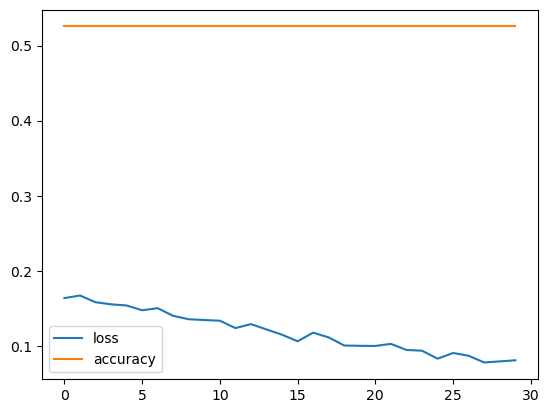

In [110]:
df.plot()